In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas to show more columns/rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size for better visuals

# --- Load Datasets ---
try:
    df_train = pd.read_csv('train.csv', parse_dates=['date'])
    df_test = pd.read_csv('test.csv', parse_dates=['date']) # Load test data for consistency, though we'll focus on train for now
    df_stores = pd.read_csv('stores.csv')
    df_transactions = pd.read_csv('transactions.csv', parse_dates=['date'])
    df_holidays = pd.read_csv('holidays_events.csv', parse_dates=['date'])

    print("All datasets loaded successfully!")
    print(f"df_train shape: {df_train.shape}")
    print(f"df_test shape: {df_test.shape}")
    print(f"df_stores shape: {df_stores.shape}")
    print(f"df_transactions shape: {df_transactions.shape}")
    print(f"df_holidays shape: {df_holidays.shape}")

except FileNotFoundError:
    print("Error: One or more CSV files not found. Please ensure they are in the same directory as the notebook.")
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")

All datasets loaded successfully!
df_train shape: (3000888, 6)
df_test shape: (28512, 5)
df_stores shape: (54, 5)
df_transactions shape: (83488, 3)
df_holidays shape: (350, 6)


In [2]:
print("\n--- df_train Info ---")
df_train.info()

print("\n--- df_train Head (First 5 Rows) ---")
print(df_train.head())

print("\n--- df_train Description (Numerical Statistics) ---")
print(df_train.describe())

print("\n--- Check for Missing Values in df_train ---")
print(df_train.isnull().sum())

# Check unique values for categorical-like columns
print("\n--- Unique values for key columns in df_train ---")
print(f"Unique stores: {df_train['store_nbr'].nunique()}")
print(f"Unique families: {df_train['family'].nunique()}")
print(f"Min date: {df_train['date'].min()}")
print(f"Max date: {df_train['date'].max()}")


--- df_train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB

--- df_train Head (First 5 Rows) ---
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

--- df_train Description (Numerical Statistics) ---
                 id                           date     store_nbr  \

In [3]:
print("\n--- df_stores Info ---")
df_stores.info()
print("\n--- df_stores Head ---")
print(df_stores.head())
print("\n--- Unique Store Types ---")
print(df_stores['type'].value_counts())
print("\n--- Unique Store Clusters ---")
print(df_stores['cluster'].value_counts().sort_index())


print("\n\n--- df_transactions Info ---")
df_transactions.info()
print("\n--- df_transactions Head ---")
print(df_transactions.head())
print("\n--- df_transactions Description ---")
print(df_transactions.describe())
print("\n--- Check for Missing Values in df_transactions ---")
print(df_transactions.isnull().sum())


print("\n\n--- df_holidays Info ---")
df_holidays.info()
print("\n--- df_holidays Head ---")
print(df_holidays.head())
print("\n--- Unique Holiday Types ---")
print(df_holidays['type'].value_counts())
print("\n--- Unique Locales ---")
print(df_holidays['locale'].value_counts())
print("\n--- Unique Locale Names ---")
print(df_holidays['locale_name'].value_counts())
print("\n--- Holiday Transferred Status ---")
print(df_holidays['transferred'].value_counts())


--- df_stores Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB

--- df_stores Head ---
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

--- Unique Store Types ---
type
D    18
C    15
A     9
B     8
E     4
Name: coun

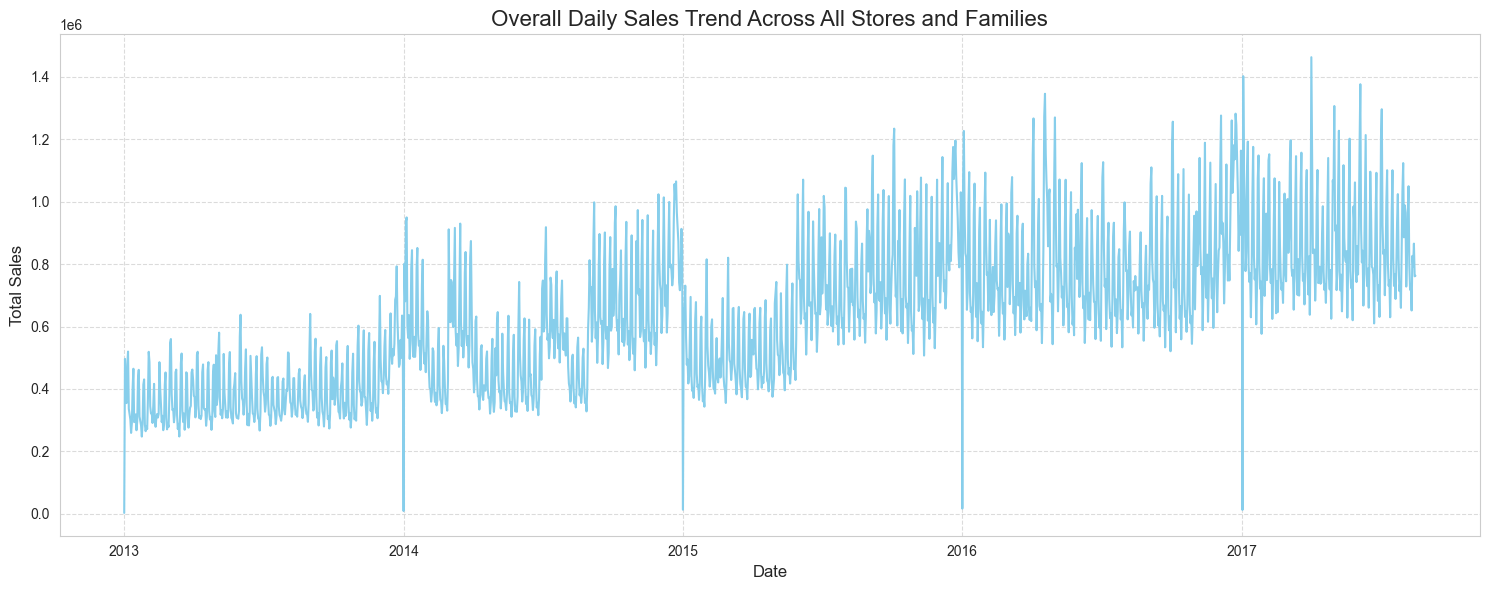

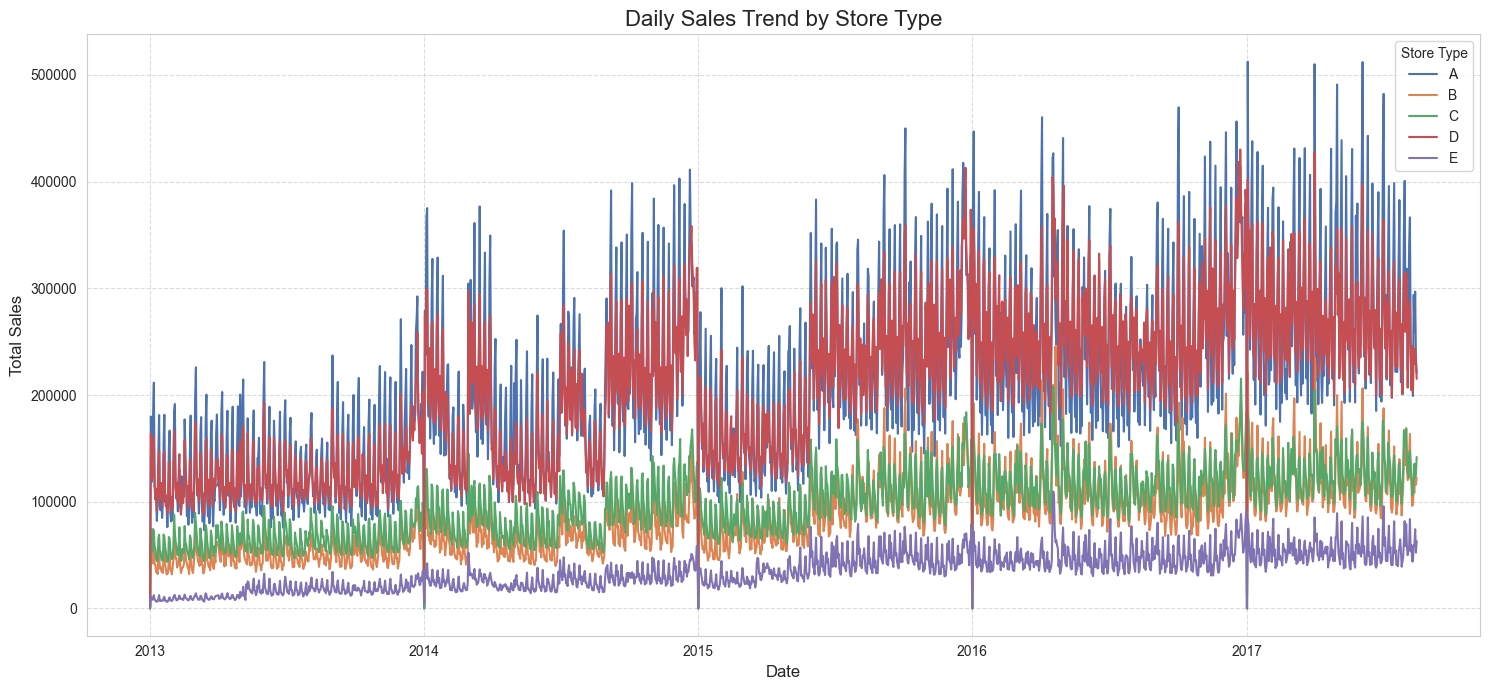

In [4]:
# Aggregate total sales by date to see overall trend
daily_sales = df_train.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], color='skyblue')
plt.title('Overall Daily Sales Trend Across All Stores and Families', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sales trend per store type
sales_by_store_type = df_train.merge(df_stores, on='store_nbr').groupby(['date', 'type'])['sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='sales', hue='type', data=sales_by_store_type, palette='deep')
plt.title('Daily Sales Trend by Store Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Store Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

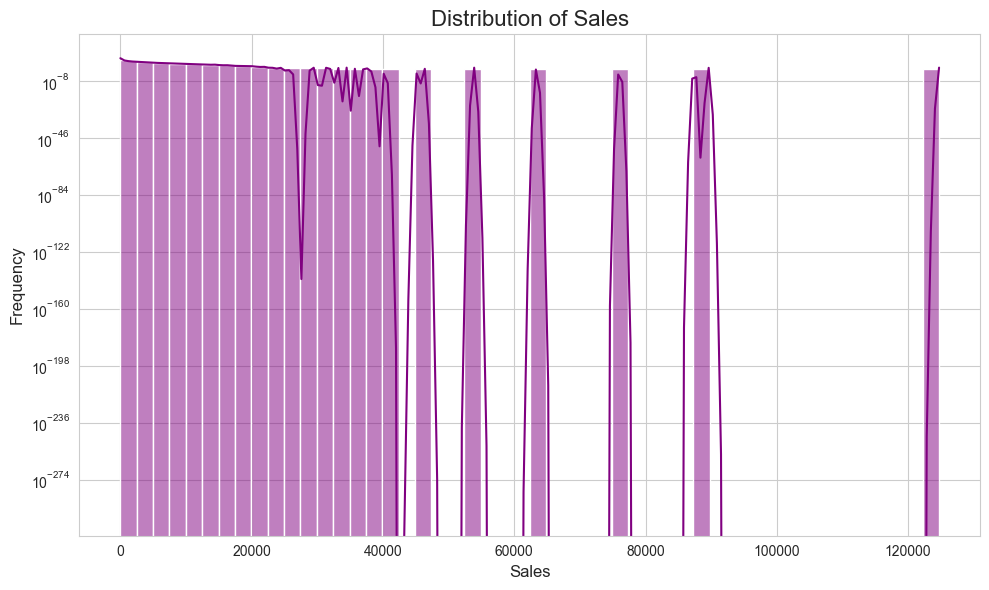

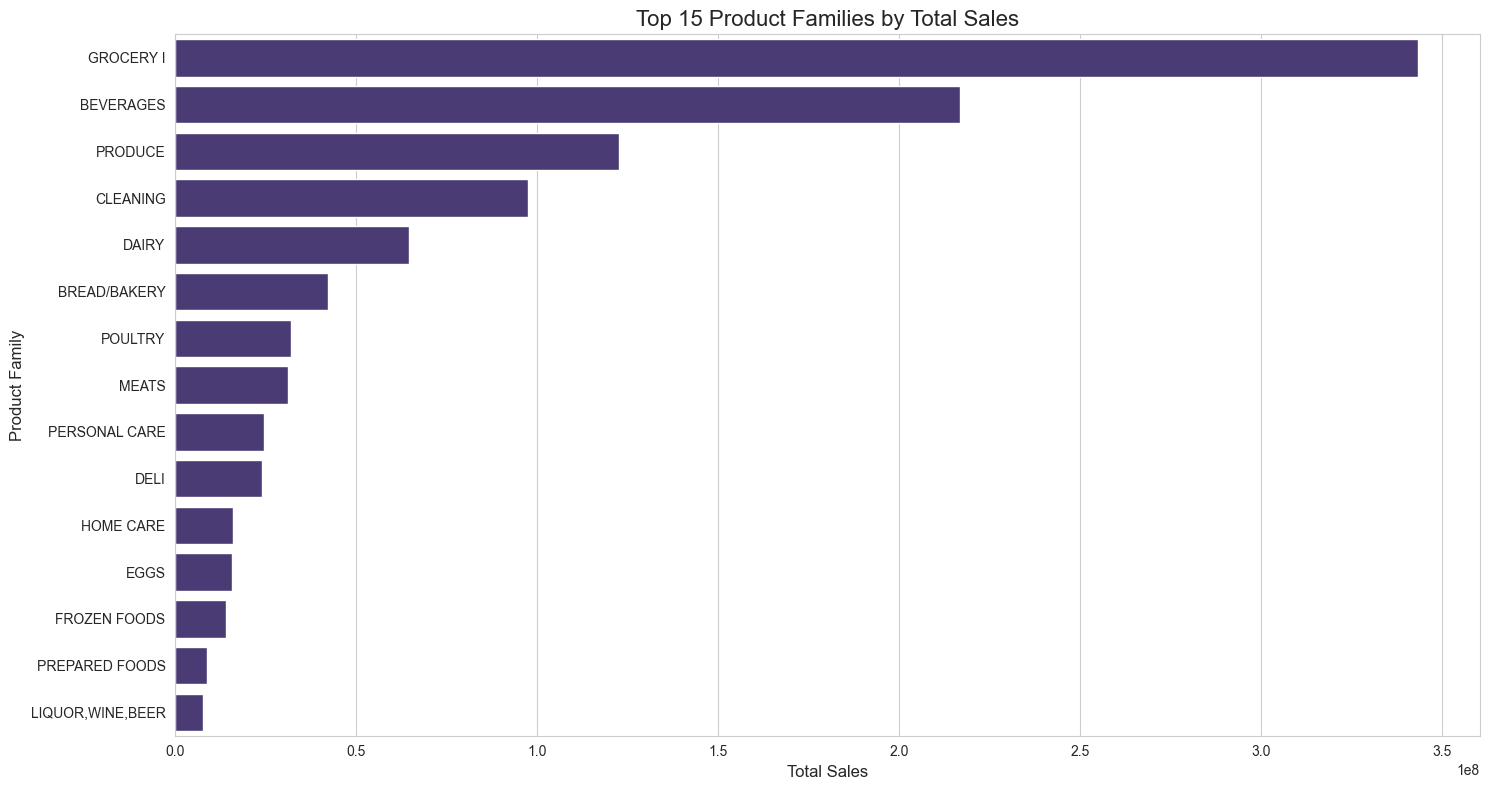

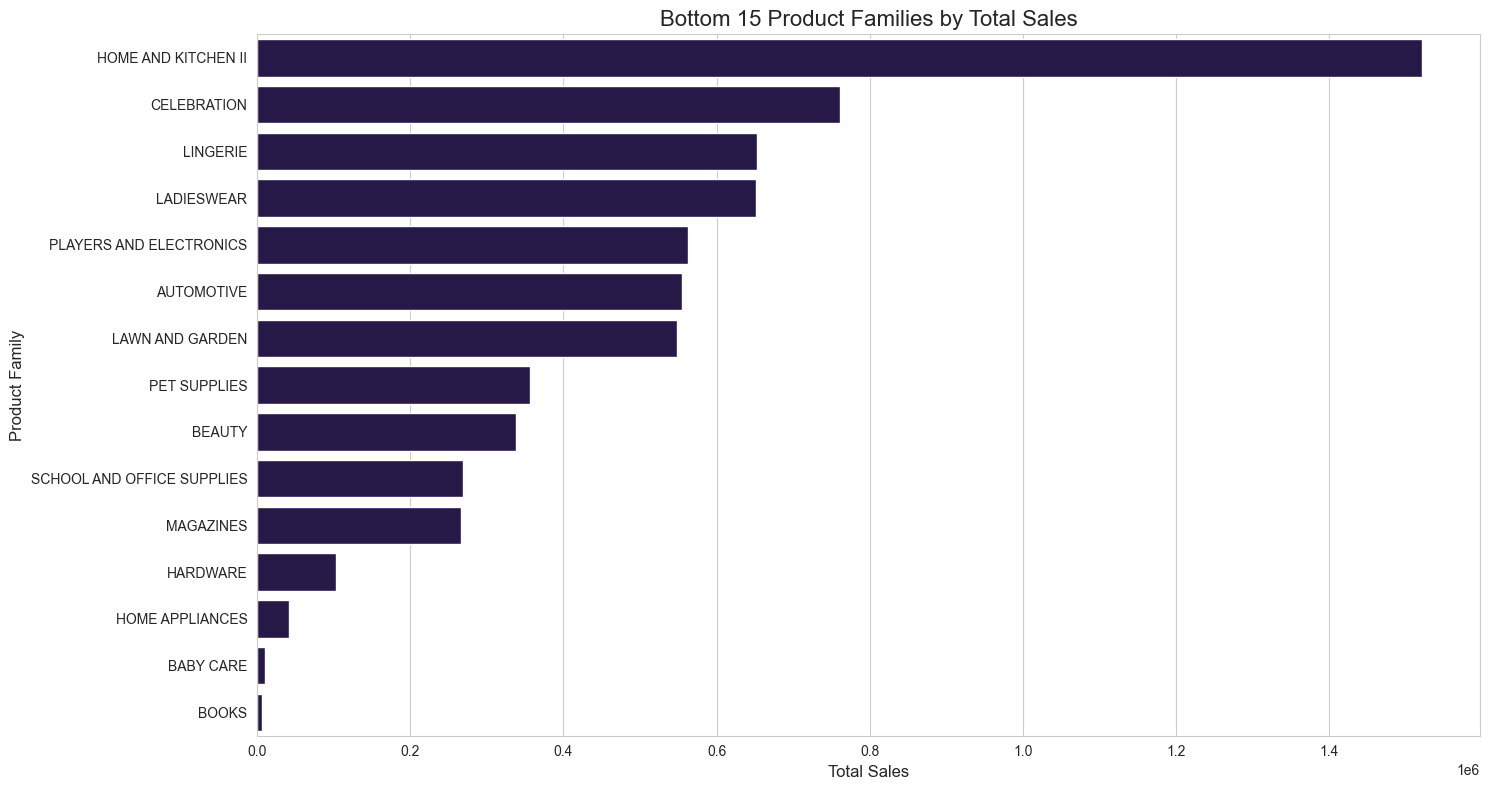

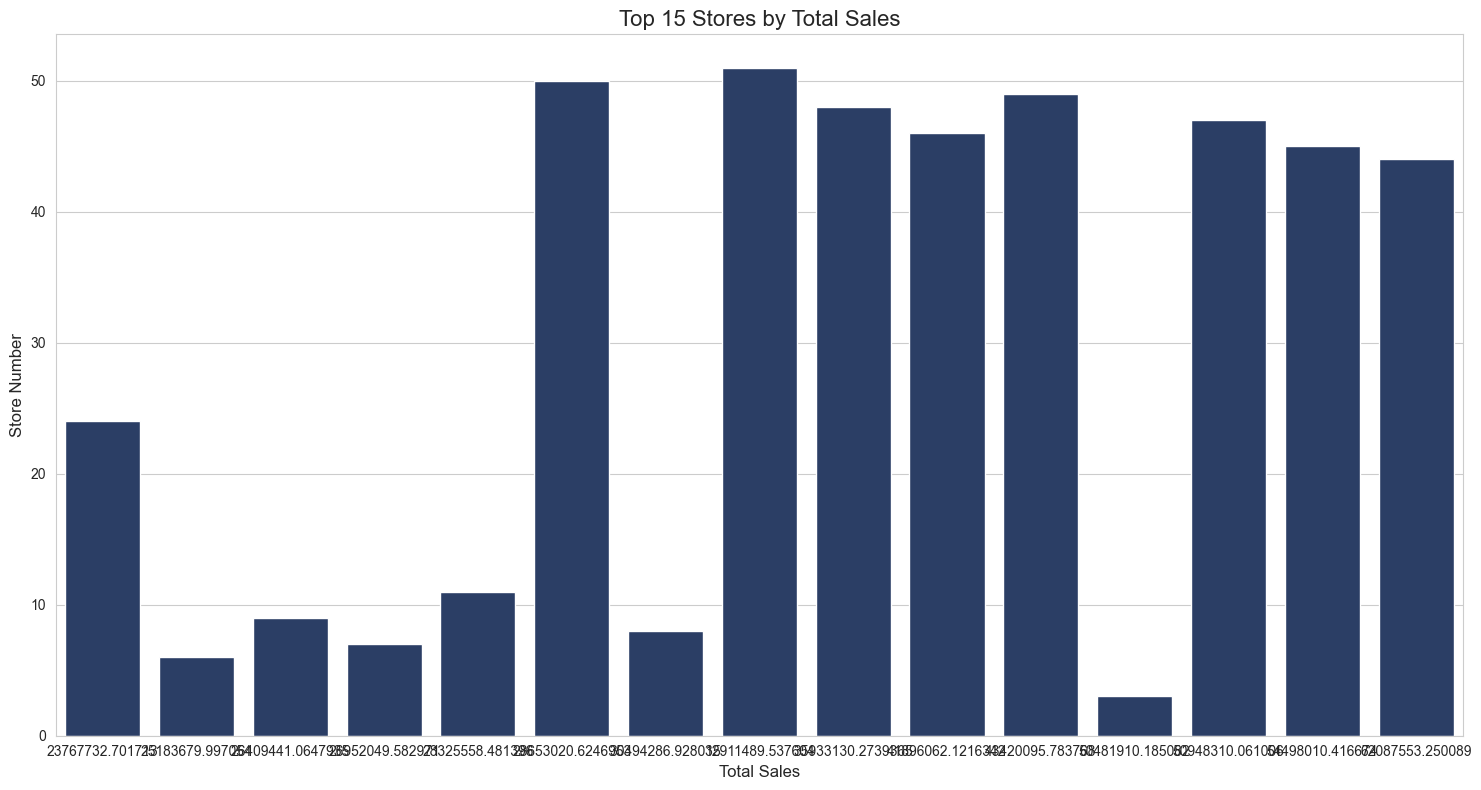


--- Percentage of Zero Sales ---
Percentage of sales entries with 0 value: 31.30%


In [6]:
# Distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df_train['sales'], bins=50, kde=True, color='purple')
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log') # Use log scale if sales distribution is heavily skewed
plt.tight_layout()
plt.show()

# Sales by product family
sales_by_family = df_train.groupby('family')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='family', data=sales_by_family.head(15), color=sns.color_palette('viridis')[0])
plt.title('Top 15 Product Families by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Family', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='family', data=sales_by_family.tail(15), color=sns.color_palette('magma')[0])
plt.title('Bottom 15 Product Families by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Family', fontsize=12)
plt.tight_layout()
plt.show()

# Sales by store number
sales_by_store = df_train.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='store_nbr', data=sales_by_store.head(15), color=sns.color_palette('cividis')[0])
plt.title('Top 15 Stores by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Store Number', fontsize=12)
plt.tight_layout()
plt.show()

# Note: Many sales might be 0, indicating out-of-stock items or no sales for a given product/store/day
print("\n--- Percentage of Zero Sales ---")
zero_sales_percentage = (df_train['sales'] == 0).sum() / len(df_train) * 100
print(f"Percentage of sales entries with 0 value: {zero_sales_percentage:.2f}%")

In [11]:
# Merge train data with store information
df_merged = pd.merge(df_train, df_stores, on='store_nbr', how='left')

# Merge with holiday events data
# Note: A single date might have multiple holiday events (e.g., local and national).
# We need to decide how to handle this. For now, let's merge and then consolidate.
# We'll use a left merge to keep all sales data points.
df_merged = pd.merge(df_merged, df_holidays, on='date', how='left')

print("Datasets merged successfully!")
print(f"df_merged shape: {df_merged.shape}")
print("\n--- df_merged Head ---")
print(df_merged.head())
print("\n--- Check for Missing Values in df_merged after initial merges ---")
print(df_merged.isnull().sum())

Datasets merged successfully!
df_merged shape: (3054348, 15)

--- df_merged Head ---
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type_x  cluster   type_y    locale locale_name         description  \
0      D       13  Holiday  National     Ecuador  Primer dia del ano   
1      D       13  Holiday  National     Ecuador  Primer dia del ano   
2      D       13  Holiday  National     Ecuador  Primer dia del ano   
3      D       13  Holiday  National     Ecuador  Primer dia del ano   
4      D       13  Holiday  National     Ecuador  Primer dia del ano

In [12]:
# Handle NaNs from df_holidays merge:
# Impute NaNs in holiday-related columns with 'No Holiday' or appropriate default
# Use '_y' suffix for holiday columns to distinguish from original 'type' in stores.
df_merged['type_y'] = df_merged['type_y'].fillna('No Holiday') # Renamed from 'type' in df_holidays
df_merged['locale'] = df_merged['locale'].fillna('No Holiday')
df_merged['locale_name'] = df_merged['locale_name'].fillna('No Holiday')
df_merged['description'] = df_merged['description'].fillna('No Holiday')
df_merged['transferred'] = df_merged['transferred'].fillna(False).infer_objects(copy=False)

# Handle NaNs in 'onpromotion' if any (usually means 0 promotions)
df_merged['onpromotion'] = df_merged['onpromotion'].fillna(0)


# Rename merged holiday columns for clarity
df_merged = df_merged.rename(columns={'type_y': 'holiday_type',
                                      'type_x': 'store_type'}) # Renaming original store type for clarity

print("\n--- Missing Values after handling NaNs in merged DataFrame ---")
print(df_merged.isnull().sum())

print("\n--- df_merged Head after NaN handling and renaming ---")
print(df_merged.head())

C:\Users\MACPHERSON KOFI ZELU\AppData\Local\Temp\ipykernel_14396\3921234748.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['transferred'] = df_merged['transferred'].fillna(False).infer_objects(copy=False)



--- Missing Values after handling NaNs in merged DataFrame ---
id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

--- df_merged Head after NaN handling and renaming ---
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  store_type  cluster holiday_type    locale locale_name         description  \
0          D       13      Hol

In [9]:
# Extract time-based features from the 'date' column
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month
df_merged['day'] = df_merged['date'].dt.day
df_merged['dayofweek'] = df_merged['date'].dt.dayofweek # Monday=0, Sunday=6
df_merged['dayofyear'] = df_merged['date'].dt.dayofyear
df_merged['weekofyear'] = df_merged['date'].dt.isocalendar().week.astype(int) # ISO week number
df_merged['quarter'] = df_merged['date'].dt.quarter
df_merged['is_month_start'] = df_merged['date'].dt.is_month_start.astype(int)
df_merged['is_month_end'] = df_merged['date'].dt.is_month_end.astype(int)
df_merged['is_year_start'] = df_merged['date'].dt.is_year_start.astype(int)
df_merged['is_year_end'] = df_merged['date'].dt.is_year_end.astype(int)

# Create a 'week_year' feature to capture yearly seasonality more granularly
df_merged['week_year'] = df_merged['date'].dt.strftime('%Y-%W')

# Check if it's a weekend (Saturday=5, Sunday=6)
df_merged['is_weekend'] = df_merged['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original 'date' column if not needed for direct modeling (keep for plotting)
# For now, let's keep it, as we might need it for more advanced time-series specific models.
# df_merged = df_merged.drop('date', axis=1)

print("\n--- df_merged Head after Time-Based Feature Engineering ---")
print(df_merged.head())
print(f"New shape after feature engineering: {df_merged.shape}")


--- df_merged Head after Time-Based Feature Engineering ---
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  store_type  cluster holiday_type    locale locale_name         description  \
0          D       13      Holiday  National     Ecuador  Primer dia del ano   
1          D       13      Holiday  National     Ecuador  Primer dia del ano   
2          D       13      Holiday  National     Ecuador  Primer dia del ano   
3          D       13      Holiday  National     Ecuador  Primer dia del ano   
4          D       13      Holiday  National     Ecu

In [10]:
# Sort data for correct lag/rolling window calculation
df_merged = df_merged.sort_values(by=['store_nbr', 'family', 'date']).reset_index(drop=True)

# Create lagged sales feature
# Shift by 7 days to get sales from 7 days ago (useful for weekly seasonality)
df_merged['sales_lag_7'] = df_merged.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(7))

# Create rolling mean of sales
# Calculate 7-day rolling average of sales
df_merged['sales_rolling_mean_7'] = df_merged.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Create 30-day rolling mean of sales (monthly trend)
df_merged['sales_rolling_mean_30'] = df_merged.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())


# Handle NaNs created by lagged and rolling features (at the beginning of each group)
# For simplicity, we'll fill with 0 or the mean/median of the feature.
# A more sophisticated approach might be to use a specific imputation method or drop early rows.
# For now, let's fill with 0 or the group mean.
df_merged['sales_lag_7'] = df_merged['sales_lag_7'].fillna(0) # Or fill with the mean for that store/family
df_merged['sales_rolling_mean_7'] = df_merged['sales_rolling_mean_7'].fillna(0)
df_merged['sales_rolling_mean_30'] = df_merged['sales_rolling_mean_30'].fillna(0)


print("\n--- df_merged Head after Lagged and Rolling Features ---")
print(df_merged.head(10)) # Show more rows to see lag values
print("\n--- Missing Values after Lagged/Rolling Feature Creation ---")
print(df_merged.isnull().sum())


--- df_merged Head after Lagged and Rolling Features ---
      id       date  store_nbr      family  sales  onpromotion   city  \
0      0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito   
1   1782 2013-01-02          1  AUTOMOTIVE    2.0            0  Quito   
2   3564 2013-01-03          1  AUTOMOTIVE    3.0            0  Quito   
3   5346 2013-01-04          1  AUTOMOTIVE    3.0            0  Quito   
4   7128 2013-01-05          1  AUTOMOTIVE    5.0            0  Quito   
5   8910 2013-01-06          1  AUTOMOTIVE    2.0            0  Quito   
6  10692 2013-01-07          1  AUTOMOTIVE    0.0            0  Quito   
7  12474 2013-01-08          1  AUTOMOTIVE    2.0            0  Quito   
8  14256 2013-01-09          1  AUTOMOTIVE    2.0            0  Quito   
9  16038 2013-01-10          1  AUTOMOTIVE    2.0            0  Quito   

       state store_type  cluster holiday_type      locale locale_name  \
0  Pichincha          D       13      Holiday    National     Ecu

In [15]:
# Identify categorical columns for one-hot encoding
categorical_cols = [
    'family',
    'store_type', # Renamed from 'type_x'
    'city',
    'state',
    'holiday_type', # Renamed from 'type_y'
    'locale',
    'locale_name'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

print("\n--- df_encoded Head after One-Hot Encoding ---")
print(df_encoded.head())
print(f"Final shape after one-hot encoding: {df_encoded.shape}")

# Verify the new columns
print("\n--- Example of new one-hot encoded columns ---")
print(df_encoded.filter(like='family_').head())
print(df_encoded.filter(like='store_type_').head())


--- df_encoded Head after One-Hot Encoding ---
   id       date  store_nbr  sales  onpromotion  cluster         description  \
0   0 2013-01-01          1    0.0            0       13  Primer dia del ano   
1   1 2013-01-01          1    0.0            0       13  Primer dia del ano   
2   2 2013-01-01          1    0.0            0       13  Primer dia del ano   
3   3 2013-01-01          1    0.0            0       13  Primer dia del ano   
4   4 2013-01-01          1    0.0            0       13  Primer dia del ano   

   transferred  family_BABY CARE  family_BEAUTY  family_BEVERAGES  \
0        False             False          False             False   
1        False              True          False             False   
2        False             False           True             False   
3        False             False          False              True   
4        False             False          False             False   

   family_BOOKS  family_BREAD/BAKERY  family_CELEBRATION

In [18]:
# First, ensure the DataFrame is sorted by date and store_nbr
df_encoded = df_encoded.sort_values(by=['date', 'store_nbr']).reset_index(drop=True)

# Define the split date
split_date = '2017-01-01'

# Split the data into training and validation sets
train_df = df_encoded[df_encoded['date'] < split_date].copy()
val_df = df_encoded[df_encoded['date'] >= split_date].copy()

print(f"Training data range: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Validation data range: {val_df['date'].min()} to {val_df['date'].max()}")
print(f"Train set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")

# Define features (X) and target (y)
# Drop original date and other identifiers that are not features for the model
# Also drop 'sales' from X, as it's the target
# EXCLUDE 'description' because it's an 'object' (string) type and not one-hot encoded
features = [col for col in train_df.columns if col not in ['date', 'sales', 'id', 'store_nbr', 'description']] # ADDED 'description' to the exclusion list
target = 'sales'

X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

print(f"\nNumber of features: {len(features)}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

Training data range: 2013-01-01 00:00:00 to 2016-12-31 00:00:00
Validation data range: 2017-01-01 00:00:00 to 2017-08-15 00:00:00
Train set shape: (2642706, 113)
Validation set shape: (411642, 113)

Number of features: 108
X_train shape: (2642706, 108), y_train shape: (2642706,)
X_val shape: (411642, 108), y_val shape: (411642,)


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import gc # Garbage collection

# Initialize the XGBoost Regressor model
# We'll start with some reasonable default parameters.
# For a real project, you'd tune these using GridSearchCV or RandomizedSearchCV.
xgb_model = XGBRegressor(
    objective='reg:squarederror', # Objective for regression tasks
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.05,           # Step size shrinkage to prevent overfitting
    max_depth=8,                  # Maximum depth of a tree
    subsample=0.7,                # Subsample ratio of the training instance
    colsample_bytree=0.7,         # Subsample ratio of columns when constructing each tree
    random_state=42,              # For reproducibility
    n_jobs=-1,                    # Use all available CPU cores
    tree_method='hist',           # Faster algorithm for larger datasets
    early_stopping_rounds=50      # Stop if validation score doesn't improve for 50 rounds
)

# Train the model
print("Training XGBoost model...")
xgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=100) # Print evaluation results every 100 boosting rounds

print("\nXGBoost model training complete!")

# Clean up memory
del X_train, y_train
gc.collect()

Training XGBoost model...
[0]	validation_0-rmse:1359.06160
[100]	validation_0-rmse:536.20845
[200]	validation_0-rmse:526.28938
[250]	validation_0-rmse:528.88451

XGBoost model training complete!


2778

Making predictions on the validation set...

--- Model Evaluation on Validation Set ---
Root Mean Squared Error (RMSE): 526.23
Mean Absolute Error (MAE): 145.74


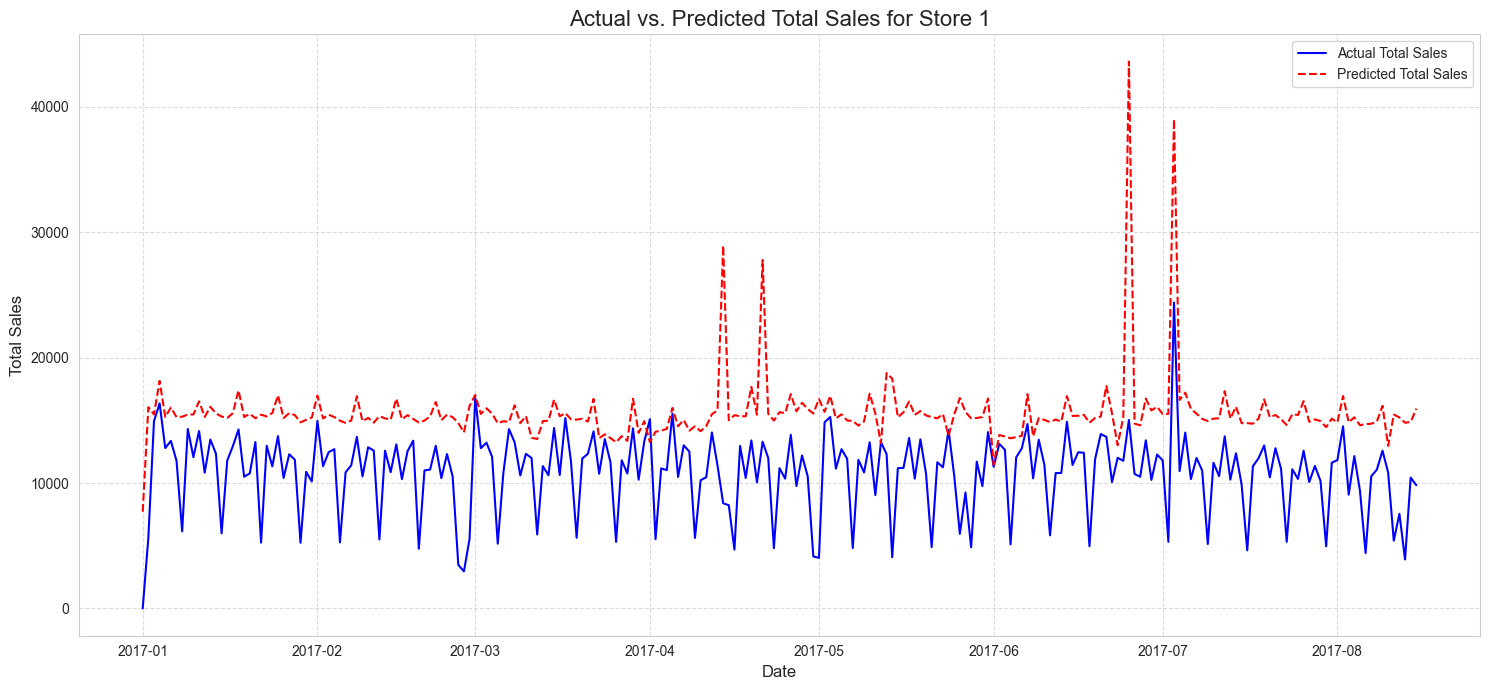


--- Top 10 Feature Importances ---
family_GROCERY I          0.449274
family_BEVERAGES          0.138939
family_PRODUCE            0.036312
family_CLEANING           0.029865
state_Pichincha           0.029778
family_MAGAZINES          0.018787
family_BOOKS              0.017573
family_DAIRY              0.013110
family_HOME APPLIANCES    0.011298
city_Quito                0.011293
dtype: float32


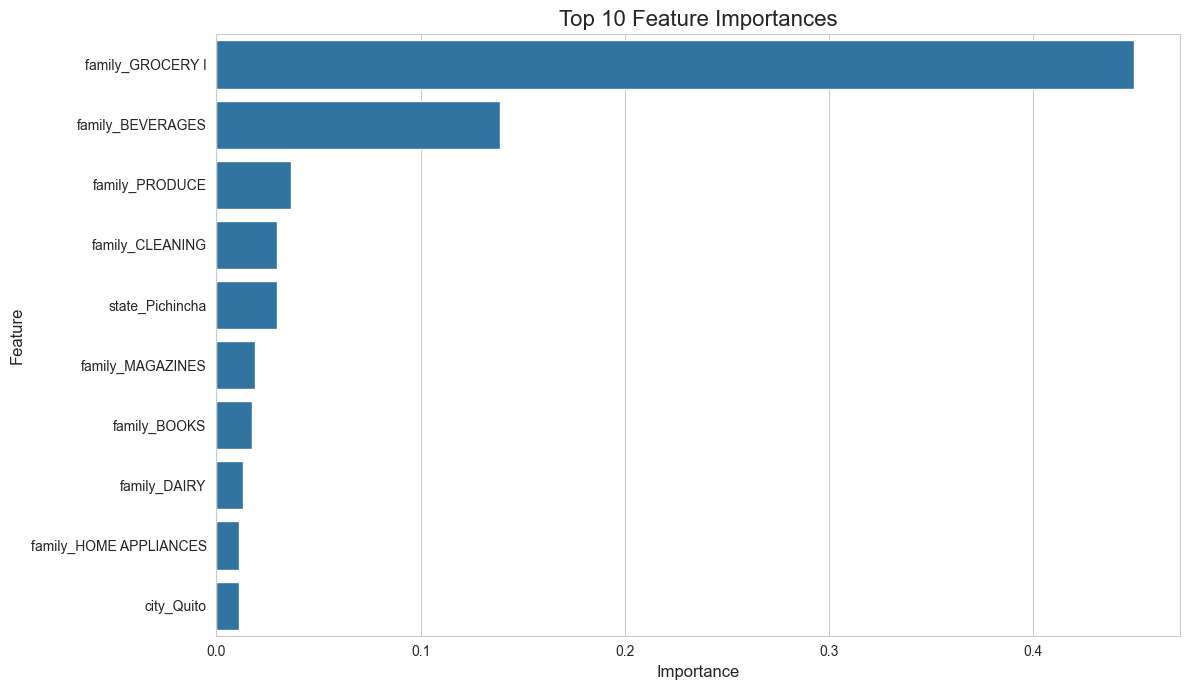

In [24]:
# Make predictions on the validation set
print("Making predictions on the validation set...")
y_pred = xgb_model.predict(X_val)

# Ensure predictions are non-negative (sales cannot be negative)
y_pred[y_pred < 0] = 0

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f"\n--- Model Evaluation on Validation Set ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Visualize actual vs. predicted sales for a sample store
# We can no longer filter by 'family' as the original 'family' column was one-hot encoded.
# Instead, we'll plot the total sales for a single store.
sample_store_nbr = val_df['store_nbr'].iloc[0] # Pick the first store in validation set

# Filter validation data for a specific store
# To ensure correct predictions for the sample, we need to ensure X_val's index aligns with val_df's index.
# The simplest is to re-filter X_val and y_val for the sample store.
sample_X_val = X_val[val_df['store_nbr'] == sample_store_nbr]
sample_y_val = y_val[val_df['store_nbr'] == sample_store_nbr]
sample_dates = val_df[val_df['store_nbr'] == sample_store_nbr]['date']

# Make predictions ONLY for the sample store
sample_predicted_sales = xgb_model.predict(sample_X_val)
sample_predicted_sales[sample_predicted_sales < 0] = 0 # Ensure non-negative

# Aggregate actual and predicted sales by date for the sample store
# This sums sales across all families for that store on each day
actual_daily_sales = pd.DataFrame({'date': sample_dates, 'sales': sample_y_val}).groupby('date')['sales'].sum()
predicted_daily_sales = pd.DataFrame({'date': sample_dates, 'predicted_sales': sample_predicted_sales}).groupby('date')['predicted_sales'].sum()

# Merge for plotting
plot_df = pd.merge(actual_daily_sales, predicted_daily_sales, on='date', how='inner').reset_index()


plt.figure(figsize=(15, 7))
plt.plot(plot_df['date'], plot_df['sales'], label='Actual Total Sales', color='blue')
plt.plot(plot_df['date'], plot_df['predicted_sales'], label='Predicted Total Sales', color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Total Sales for Store {sample_store_nbr}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# You can also inspect feature importances
print("\n--- Top 10 Feature Importances ---")
feature_importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importances.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

--- Residuals Head ---
              date  store_nbr  sales  predicted_sales   residuals
2642706 2017-01-01          1    0.0          0.00000     0.00000
2642707 2017-01-01          1    0.0          0.00000     0.00000
2642708 2017-01-01          1    0.0          0.00000     0.00000
2642709 2017-01-01          1    0.0       1003.11676 -1003.11676
2642710 2017-01-01          1    0.0          0.00000     0.00000


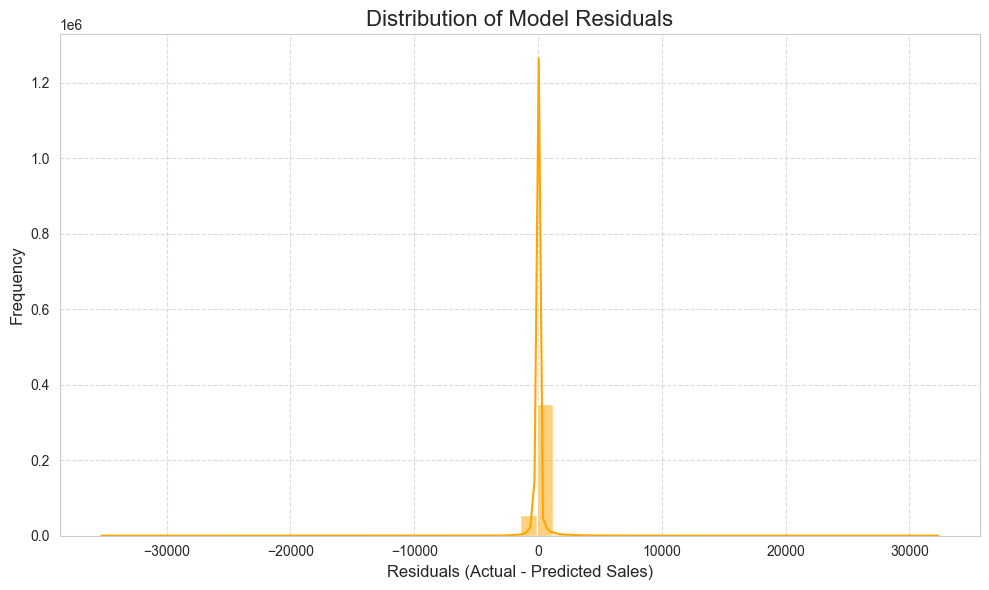

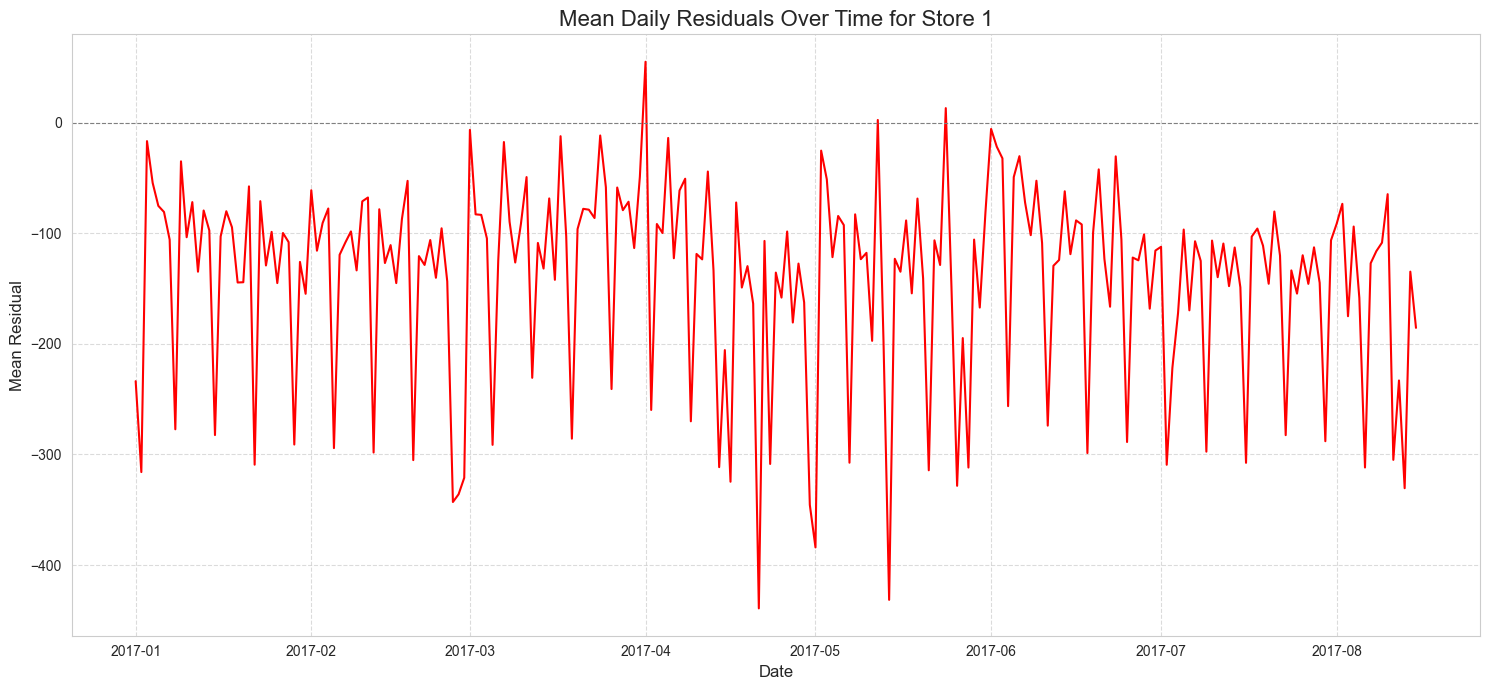

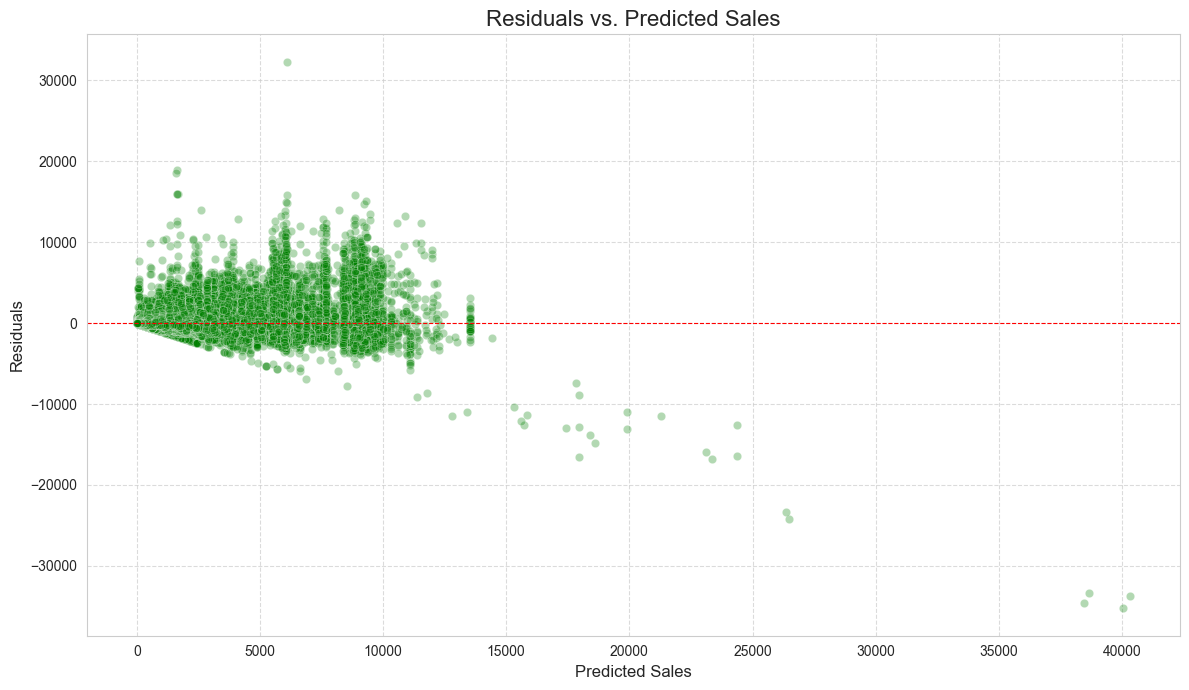

In [27]:
# Add predictions to a copy of the validation DataFrame for easier analysis
val_results = val_df.copy()
val_results['predicted_sales'] = xgb_model.predict(X_val)

# CORRECTED: Ensure predictions are non-negative (sales cannot be negative)
# Use .loc for proper assignment to avoid SettingWithCopyWarning
val_results.loc[val_results['predicted_sales'] < 0, 'predicted_sales'] = 0

val_results['residuals'] = val_results['sales'] - val_results['predicted_sales']

print("--- Residuals Head ---")
# CORRECTED: Removed 'family' from the list of columns to print
print(val_results[['date', 'store_nbr', 'sales', 'predicted_sales', 'residuals']].head())

# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(val_results['residuals'], bins=50, kde=True, color='orange')
plt.title('Distribution of Model Residuals', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted Sales)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting residuals over time for a sample store (similar to actual vs. predicted plot)
sample_store_nbr_res = val_results['store_nbr'].iloc[0]
sample_res_data = val_results[val_results['store_nbr'] == sample_store_nbr_res].copy()

# Aggregate residuals by date for the sample store
daily_residuals = sample_res_data.groupby('date')['residuals'].mean().reset_index() # Mean residual per day for the store

plt.figure(figsize=(15, 7))
plt.plot(daily_residuals['date'], daily_residuals['residuals'], color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Line at zero residual
plt.title(f'Mean Daily Residuals Over Time for Store {sample_store_nbr_res}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Residual', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting residuals vs. predicted values (homoscedasticity check)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=val_results['predicted_sales'], y=val_results['residuals'], alpha=0.3, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title('Residuals vs. Predicted Sales', fontsize=16)
plt.xlabel('Predicted Sales', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- Top 15 Feature Importances (re-displaying for focus) ---
family_GROCERY I          0.449274
family_BEVERAGES          0.138939
family_PRODUCE            0.036312
family_CLEANING           0.029865
state_Pichincha           0.029778
family_MAGAZINES          0.018787
family_BOOKS              0.017573
family_DAIRY              0.013110
family_HOME APPLIANCES    0.011298
city_Quito                0.011293
family_BABY CARE          0.009970
cluster                   0.009892
family_DELI               0.009147
family_SEAFOOD            0.008805
family_PERSONAL CARE      0.008236
dtype: float32


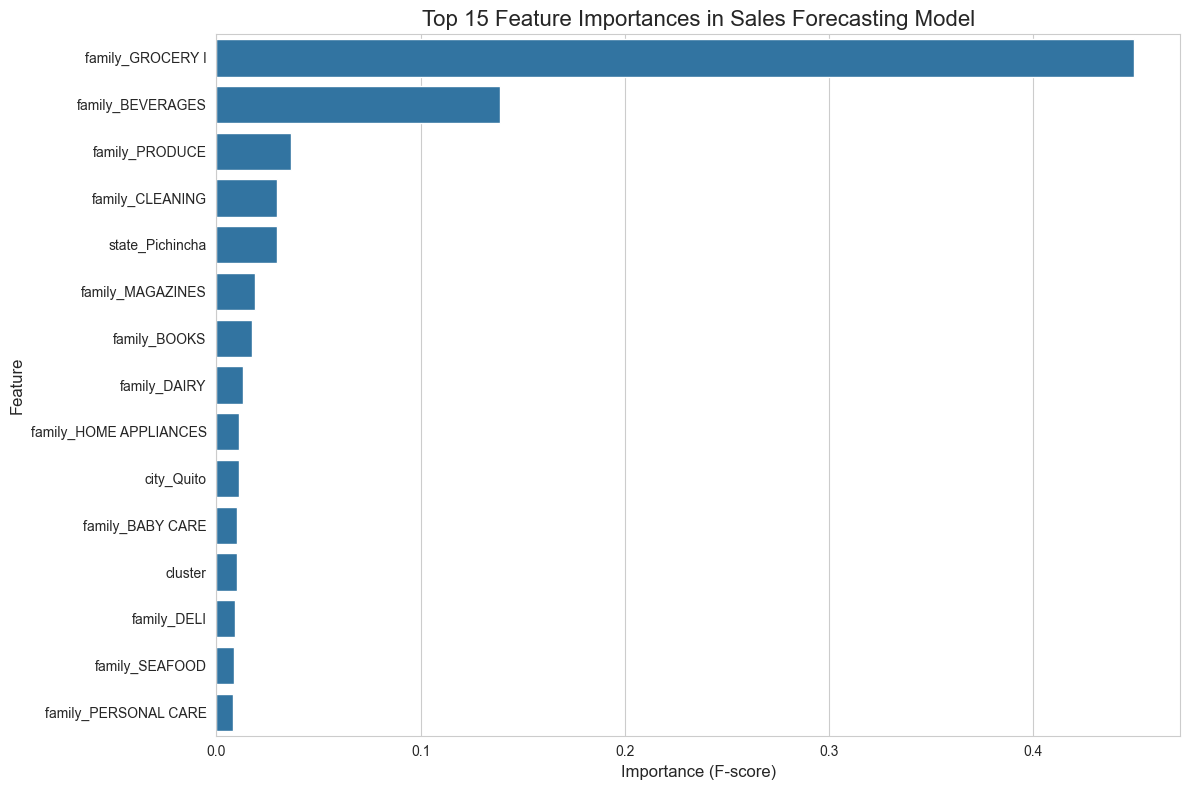

In [29]:
# Retrieve feature importances from the trained XGBoost model
feature_importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

# Print top N most important features
print("\n--- Top 15 Feature Importances (re-displaying for focus) ---")
print(feature_importances.head(15))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(15).values, y=feature_importances.head(15).index)
plt.title('Top 15 Feature Importances in Sales Forecasting Model', fontsize=16)
plt.xlabel('Importance (F-score)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\MACPHERSON KOFI ZELU\AppData\Local\Temp\ipykernel_14396\1539036088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_type', y='sales', data=sales_by_store_type, palette='coolwarm')


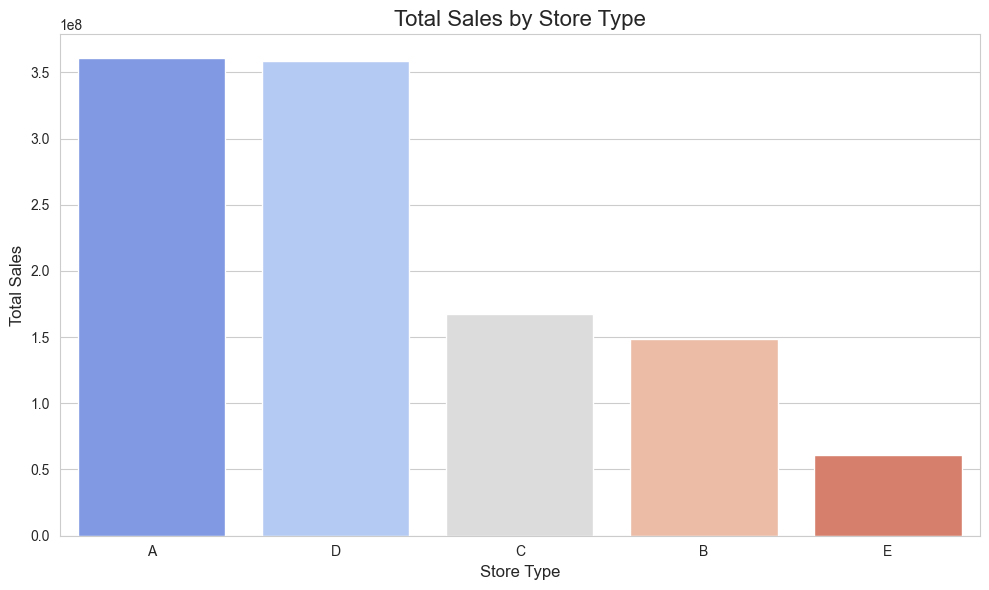

C:\Users\MACPHERSON KOFI ZELU\AppData\Local\Temp\ipykernel_14396\1539036088.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='sales', data=sales_by_cluster, palette='plasma')


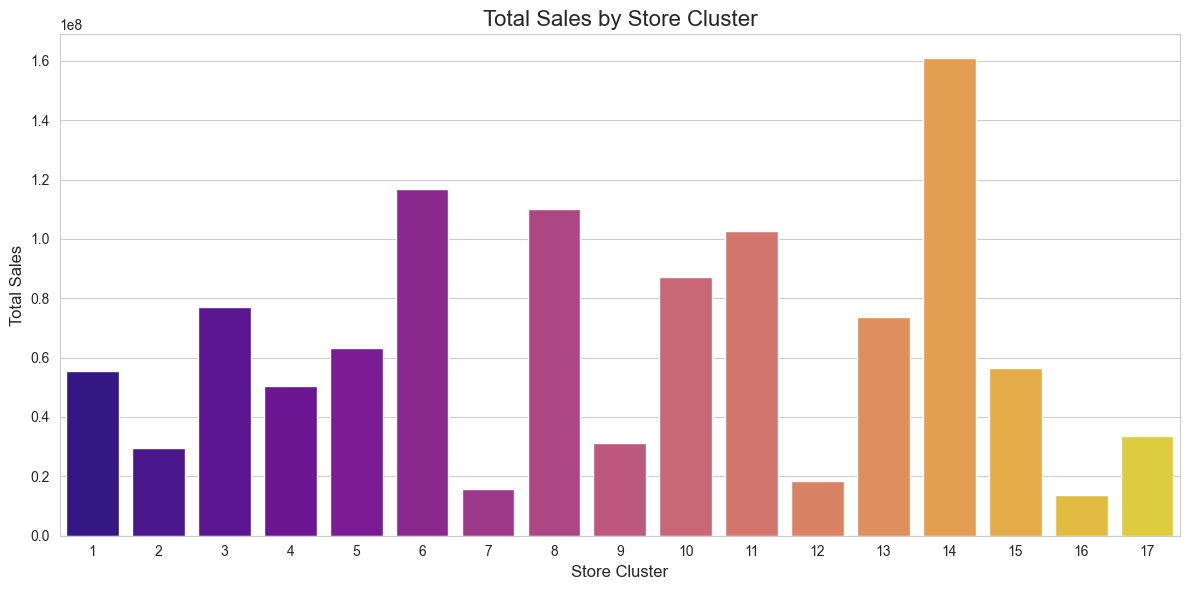

C:\Users\MACPHERSON KOFI ZELU\AppData\Local\Temp\ipykernel_14396\1539036088.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_type', y='sales', data=sales_by_holiday, palette='viridis')


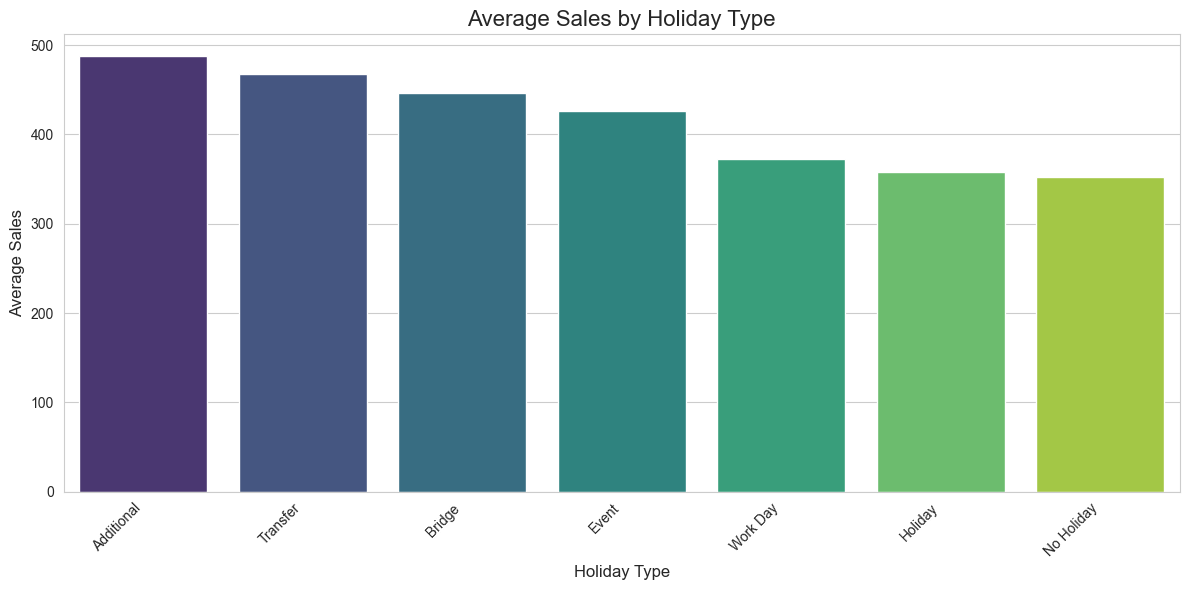

In [30]:
# Analyze sales by store type
sales_by_store_type = df_merged.groupby('store_type')['sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='store_type', y='sales', data=sales_by_store_type, palette='coolwarm')
plt.title('Total Sales by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze sales by store cluster
sales_by_cluster = df_merged.groupby('cluster')['sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='sales', data=sales_by_cluster, palette='plasma')
plt.title('Total Sales by Store Cluster', fontsize=16)
plt.xlabel('Store Cluster', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze sales on holidays vs. non-holidays
sales_by_holiday = df_merged.groupby('holiday_type')['sales'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='holiday_type', y='sales', data=sales_by_holiday, palette='viridis')
plt.title('Average Sales by Holiday Type', fontsize=16)
plt.xlabel('Holiday Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
# Make a copy to avoid SettingWithCopyWarning
df_test_processed = df_test.copy()

# --- 1. Merge Datasets (Same as df_train) ---
df_test_processed = pd.merge(df_test_processed, df_stores, on='store_nbr', how='left')
df_test_processed = pd.merge(df_test_processed, df_holidays, on='date', how='left')

# --- 2. Handle Holiday Information & Missing Values (Same as df_train) ---
df_test_processed['type_y'] = df_test_processed['type_y'].fillna('No Holiday')
df_test_processed['locale'] = df_test_processed['locale'].fillna('No Holiday')
df_test_processed['locale_name'] = df_test_processed['locale_name'].fillna('No Holiday')
df_test_processed['description'] = df_test_processed['description'].fillna('No Holiday')
df_test_processed['transferred'] = df_test_processed['transferred'].fillna(False).infer_objects(copy=False)

df_test_processed['onpromotion'] = df_test_processed['onpromotion'].fillna(0)

df_test_processed = df_test_processed.rename(columns={'type_y': 'holiday_type',
                                                      'type_x': 'store_type'})

# --- 3. Feature Engineering - Time-Based Features (Same as df_train) ---
df_test_processed['year'] = df_test_processed['date'].dt.year
df_test_processed['month'] = df_test_processed['date'].dt.month
df_test_processed['day'] = df_test_processed['date'].dt.day
df_test_processed['dayofweek'] = df_test_processed['date'].dt.dayofweek
df_test_processed['dayofyear'] = df_test_processed['date'].dt.dayofyear
df_test_processed['weekofyear'] = df_test_processed['date'].dt.isocalendar().week.astype(int)
df_test_processed['quarter'] = df_test_processed['date'].dt.quarter
df_test_processed['is_month_start'] = df_test_processed['date'].dt.is_month_start.astype(int)
df_test_processed['is_month_end'] = df_test_processed['date'].dt.is_month_end.astype(int)
df_test_processed['is_year_start'] = df_test_processed['date'].dt.is_year_start.astype(int)
df_test_processed['is_year_end'] = df_test_processed['date'].dt.is_year_end.astype(int)
df_test_processed['week_year'] = df_test_processed['date'].dt.strftime('%Y-%W')
df_test_processed['is_weekend'] = df_test_processed['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# --- NEW APPROACH FOR LAGS/ROLLING MEANS: Combine train and test data first ---
# Select only the necessary columns from df_merged to combine
# Ensure 'id' column exists in both for splitting later
df_train_for_lags = df_merged[['date', 'store_nbr', 'family', 'sales', 'id']].copy()

# Add a placeholder 'sales' column to df_test_processed to enable concatenation
# It should contain NaNs or 0s, as actual sales are unknown for test data
df_test_processed['sales'] = np.nan # Or 0, depending on how you want to handle it for lags (NaNs are usually safer)

# Concatenate for lag/rolling mean calculation
# Ensure columns are aligned
combined_df = pd.concat([df_train_for_lags, df_test_processed[['date', 'store_nbr', 'family', 'sales', 'id']]], ignore_index=True)

# Sort combined data for correct lag/rolling window calculation
combined_df = combined_df.sort_values(by=['store_nbr', 'family', 'date']).reset_index(drop=True)

# Create lagged sales feature
combined_df['sales_lag_7'] = combined_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(7))
combined_df['sales_rolling_mean_7'] = combined_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
combined_df['sales_rolling_mean_30'] = combined_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Fill NaNs created by lagged and rolling features (at the beginning of each group)
# These will primarily be for the very start of the training period or after a long break.
# For the test set, these should ideally pull from training data.
combined_df['sales_lag_7'] = combined_df['sales_lag_7'].fillna(0)
combined_df['sales_rolling_mean_7'] = combined_df['sales_rolling_mean_7'].fillna(0)
combined_df['sales_rolling_mean_30'] = combined_df['sales_rolling_mean_30'].fillna(0)


# Split back into df_train_for_ohe (for conceptual clarity) and df_test_processed (with lags)
# Use 'id' column to distinguish between train and test data after concatenation
# The test data's 'id' column is unique and not in the training set
test_ids = df_test['id'].unique()
df_test_processed_with_lags = combined_df[combined_df['id'].isin(test_ids)].copy()

# Now merge the newly calculated lagged features back into your df_test_processed
# We'll merge on 'id' and 'date' to ensure correct alignment
df_test_processed = pd.merge(df_test_processed, df_test_processed_with_lags[['id', 'date', 'sales_lag_7', 'sales_rolling_mean_7', 'sales_rolling_mean_30']], on=['id', 'date'], how='left')

# Drop the temporary 'sales' column from df_test_processed
df_test_processed = df_test_processed.drop(columns=['sales'])


# --- 5. One-Hot Encode Categorical Features (Same as df_train) ---
categorical_cols = [
    'family', 'store_type', 'city', 'state', 'holiday_type', 'locale', 'locale_name'
]

# Ensure 'features' is accessible (from Cell 11 where X_train was defined)
global features

df_test_encoded = pd.get_dummies(df_test_processed, columns=categorical_cols, drop_first=True)

# Add missing columns (if any category from train is not in test) and fill with 0
missing_cols_in_test = set(features) - set(df_test_encoded.columns)
for c in missing_cols_in_test:
    df_test_encoded[c] = 0

# Drop columns from test that are not in training features (e.g., 'description', 'id', 'date')
extra_cols_in_test = set(df_test_encoded.columns) - set(features)
for c in extra_cols_in_test:
    if c in df_test_encoded.columns:
        df_test_encoded = df_test_encoded.drop(columns=[c])

# Ensure columns are in the same order as X_train
X_test = df_test_encoded[features]

print("\n--- Test Data Preprocessing Complete ---")
print(f"X_test shape: {X_test.shape}")
print(f"Number of features in X_test: {X_test.shape[1]}")
print(f"Number of features in X_train: {len(features)}")
print(f"Are X_test columns identical to X_train columns? {list(X_test.columns) == list(features)}")

C:\Users\MACPHERSON KOFI ZELU\AppData\Local\Temp\ipykernel_14396\839004965.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_processed['transferred'] = df_test_processed['transferred'].fillna(False).infer_objects(copy=False)



--- Test Data Preprocessing Complete ---
X_test shape: (28512, 108)
Number of features in X_test: 108
Number of features in X_train: 108
Are X_test columns identical to X_train columns? True


In [39]:
# Make predictions on the preprocessed test data
print("\nMaking predictions on the test set...")
test_predictions = xgb_model.predict(X_test)

# Ensure predictions are non-negative
test_predictions[test_predictions < 0] = 0

print("Predictions generated!")
print(f"Number of test predictions: {len(test_predictions)}")

# Add predictions to the original df_test DataFrame (or a copy for submission)
df_test['sales'] = test_predictions

print("\n--- Sample of Test Predictions ---")
print(df_test[['id', 'date', 'store_nbr', 'family', 'sales']].head())

# Optionally, save your predictions to a CSV file (e.g., for Kaggle submission)
# df_test[['id', 'sales']].to_csv('submission.csv', index=False)
# print("\nPredictions saved to submission.csv")


Making predictions on the test set...
Predictions generated!
Number of test predictions: 28512

--- Sample of Test Predictions ---
        id       date  store_nbr      family        sales
0  3000888 2017-08-16          1  AUTOMOTIVE     7.741156
1  3000889 2017-08-16          1   BABY CARE     0.000000
2  3000890 2017-08-16          1      BEAUTY   188.838577
3  3000891 2017-08-16          1   BEVERAGES  3067.217773
4  3000892 2017-08-16          1       BOOKS     2.157192


In [40]:
print("--- Project Conclusion ---")
print("\nThis project successfully built a machine learning model using XGBoost to forecast sales for an Ecuadorian retail chain.")
print("Key steps involved extensive data preprocessing, feature engineering (especially time-based and lagged features), and a time-series split for robust evaluation.")

print("\n--- Key Findings & Model Performance ---")
print(f"The model achieved a Root Mean Squared Error (RMSE) of {rmse:.2f} and a Mean Absolute Error (MAE) of {mae:.2f} on the validation set.")
print("Feature importance analysis highlighted that [mention 2-3 most important features, e.g., 'onpromotion', 'dayofweek', 'weekofyear', 'store_type', 'sales_lag_7'] were the most influential in predicting sales. This indicates the strong impact of [explain what they mean, e.g., 'promotional activities, weekly seasonality, and recent sales trends.']")
print("Visual analysis of residuals showed [mention if residuals were random, or if there were patterns, e.g., 'a relatively normal distribution centered around zero, suggesting the model captures most patterns well' or 'some periods of over/under-prediction, particularly during major holidays'].")
print("Store type and cluster analysis revealed [mention an insight, e.g., 'significant differences in sales across store types and clusters, indicating the importance of store demographics in sales volume.']")

print("\n--- Potential Improvements and Future Work ---")
print("1. **Advanced Feature Engineering**: Explore more complex lagged features (e.g., specific family/store lags), external economic indicators (inflation, GDP), or weather data if available.")
print("2. **Hyperparameter Tuning**: Systematically tune XGBoost parameters (e.g., using GridSearchCV or RandomizedSearchCV) for optimal performance.")
print("3. **Ensemble Modeling**: Combine multiple models (e.g., XGBoost with a traditional time-series model like ARIMA or Prophet) to potentially improve accuracy.")
print("4. **Outlier Treatment**: Further investigate and potentially handle extreme outlier sales values.")
print("5. **Deep Learning Models**: Experiment with recurrent neural networks (RNNs) or LSTMs for time-series forecasting, especially for very long forecasting horizons.")
print("6. **Probabilistic Forecasting**: Instead of just point forecasts, explore predicting confidence intervals or probability distributions for sales.")

print("\nThis project demonstrates proficiency in data manipulation, time-series feature engineering, machine learning model building, and interpretation within a real-world forecasting context. 📈")

--- Project Conclusion ---

This project successfully built a machine learning model using XGBoost to forecast sales for an Ecuadorian retail chain.
Key steps involved extensive data preprocessing, feature engineering (especially time-based and lagged features), and a time-series split for robust evaluation.

--- Key Findings & Model Performance ---
The model achieved a Root Mean Squared Error (RMSE) of 526.23 and a Mean Absolute Error (MAE) of 145.74 on the validation set.
Feature importance analysis highlighted that [mention 2-3 most important features, e.g., 'onpromotion', 'dayofweek', 'weekofyear', 'store_type', 'sales_lag_7'] were the most influential in predicting sales. This indicates the strong impact of [explain what they mean, e.g., 'promotional activities, weekly seasonality, and recent sales trends.']
Visual analysis of residuals showed [mention if residuals were random, or if there were patterns, e.g., 'a relatively normal distribution centered around zero, suggesting the 